Завантаження датасету Fashion MNIST.

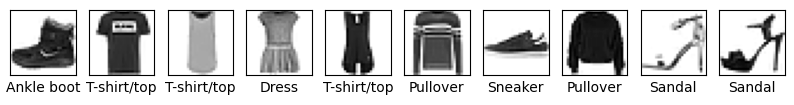

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

fashion_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for idx in range(10):
    plt.subplot(1, 10, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(label_names[train_labels[idx]])
plt.show()


Нормалізація даних.

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Побудова архітектури моделі.
neural_net_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(250, activation='relu'),
    layers.Dense(113, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі.
neural_net_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Виведення архітектури моделі.
neural_net_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 250)                 │         128,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 113)                 │          28,363 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,673 (2.13 MB)

 Trainable params: 559,673 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Використання ранньої зупинки та зменшення швидкості навчання.
early_stop_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# Навчання моделі.
training_history = neural_net_model.fit(train_images, train_labels, epochs=50,
                                         validation_data=(test_images, test_labels),
                                         callbacks=[early_stop_callback, reduce_lr_callback])


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.7841 - loss: 0.5887 - val_accuracy: 0.8486 - val_loss: 0.4075 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8635 - loss: 0.3658 - val_accuracy: 0.8454 - val_loss: 0.4393 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8804 - loss: 0.3275 - val_accuracy: 0.8627 - val_loss: 0.3996 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8903 - loss: 0.3004 - val_accuracy: 0.8764 - val_loss: 0.3502 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - accuracy: 0.8967 - loss: 0.2773 - val_accuracy: 0.8821 - val_loss: 0.3317 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9012 - loss: 0.2642 - val_accuracy: 0.8779 - val_loss: 0.3340 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - accura

In [8]:

# Збереження моделі на Google Disk.
from google.colab import drive
drive.mount('/content/drive')
neural_net_model.save('/content/drive/MyDrive/fashion_mnist_model.h5')


MessageError: Error: credential propagation was unsuccessful

Побудова графіків функції втрат і точності.

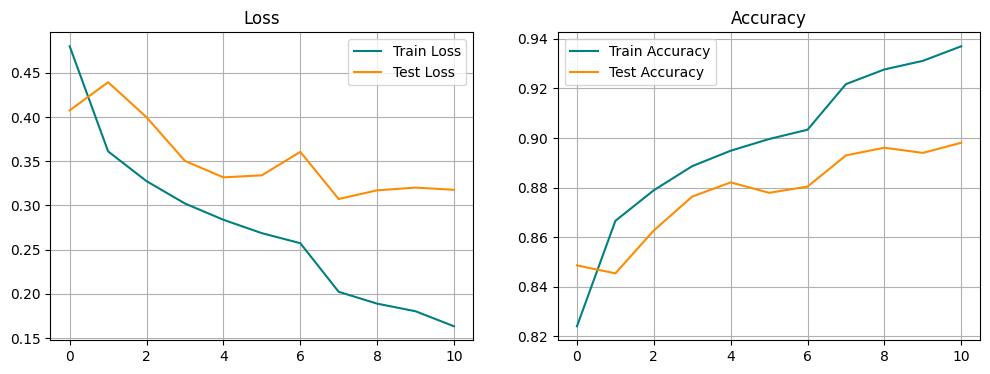

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], label='Train Loss', color='teal')
plt.plot(training_history.history['val_loss'], label='Test Loss', color='darkorange')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], label='Train Accuracy', color='teal')
plt.plot(training_history.history['val_accuracy'], label='Test Accuracy', color='darkorange')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

313/313 - 1s - 4ms/step - accuracy: 0.8930 - loss: 0.3072
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.80      0.81      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.78      0.86      0.82      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.73      0.70      0.71      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



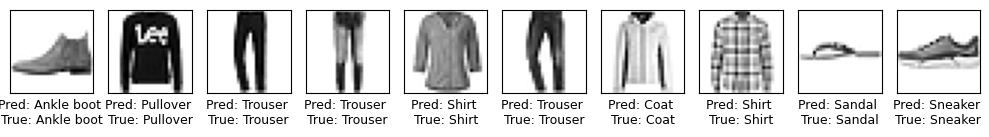

In [10]:
# Виведення класифікаційного звіту.
test_loss_value, test_accuracy = neural_net_model.evaluate(test_images, test_labels, verbose=2)
predicted_probabilities = neural_net_model.predict(test_images)

# Перетворення прогнозів у мітки.
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Виведення класифікаційного звіту.
print(classification_report(test_labels, predicted_classes, target_names=label_names))

# Виведення результатів розпізнавання із прогнозованим і справжнім класом.
plt.figure(figsize=(10, 10))
for idx in range(10):
    plt.subplot(1, 10, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {label_names[predicted_classes[idx]]} \nTrue: {label_names[test_labels[idx]]}", fontsize=9)
plt.tight_layout()
plt.show()

Завдання 2:

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import RandomSearch

fashion_data = keras.datasets.fashion_mnist
(train_set_x, train_set_y), (test_set_x, test_set_y) = fashion_data.load_data()

print("Train images shape:", train_set_x.shape)
print("Train labels shape:", train_set_y.shape)

train_set_x = train_set_x / 255.0
test_set_x = test_set_x / 255.0

<ipython-input-12-b9fdf8e91371>:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)


In [13]:
def create_model(hp):
    model_instance = keras.Sequential()
    model_instance.add(Flatten(input_shape=(28, 28)))

    for layer_idx in range(hp.Int('num_layers', 1, 5)):
        model_instance.add(Dense(units=hp.Int('units_' + str(layer_idx), min_value=3, max_value=512, step=32), activation='relu', kernel_regularizer=l2(0.001)))
        model_instance.add(BatchNormalization())
        model_instance.add(Dropout(0.3))

    model_instance.add(Dense(10, activation='softmax'))

    model_instance.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',
                                                                     values=[1e-2, 1e-3, 1e-4])),
                                                                      loss='sparse_categorical_crossentropy',
                                                                      metrics=['accuracy'])

    return model_instance

tuner_instance = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_classification'
)

# Визначення ранньої зупинки та зниження швидкості навчання.
early_stop_tuner = EarlyStopping(monitor='val_loss',
                                 patience=4,
                                 restore_best_weights=True)

reduce_lr_tuner = ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.5,
                                    patience=3,
                                    min_lr=1e-6)

tuner_instance.search(train_set_x, train_set_y, epochs=50, validation_data=(test_set_x, test_set_y), callbacks=[early_stop_tuner, reduce_lr_tuner])

# Отримання найкращої моделі.
best_neural_net_model = tuner_instance.get_best_models(num_models=1)[0]
best_neural_net_model.summary()

# Тренування та оцінка моделі.
best_neural_net_model.fit(train_set_x,
                          train_set_y,
                          epochs=50,
                           validation_data=(test_set_x, test_set_y),
                           callbacks=[early_stop_tuner, reduce_lr_tuner])

test_loss_value_2, test_accuracy_2 = best_neural_net_model.evaluate(test_set_x, test_set_y)
print('Test accuracy:', test_accuracy_2)
print('Test loss:', test_loss_value_2)

Trial 10 Complete [00h 31m 23s]
val_accuracy: 0.8647000193595886

Best val_accuracy So Far: 0.8988000154495239
Total elapsed time: 02h 46m 15s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 323)                 │         253,555 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 323)                 │           1,292 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 323)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           3,240 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 258,087 (1008.15 KB)

 Trainable params: 257,441 (1005.63 KB)

 Non-trainable params: 646 (2.52 KB)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9147 - loss: 0.2838 - val_accuracy: 0.8858 - val_loss: 0.3855 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9110 - loss: 0.2908 - val_accuracy: 0.8833 - val_loss: 0.3867 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9088 - loss: 0.2988 - val_accuracy: 0.8796 - val_loss: 0.4043 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9095 - loss: 0.2960 - val_accuracy: 0.8864 - val_loss: 0.3889 - learning_rate: 1.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9164 - loss: 0.2801 - val_accuracy: 0.8932 - val_loss: 0.3682 - learning_rate: 5.0000e-05
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9230 - loss: 0.2632 - val_accuracy: 0.8949 - val_loss: 0.3606 - learning_rate: 5.0000e-05
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 

In [17]:
# Збереження моделі на Google Disk.
from google.colab import drive
drive.mount('/content/drive')
best_neural_net_model.save('/content/drive/MyDrive/fashion_mnist_model2.h5')

MessageError: Error: credential propagation was unsuccessful

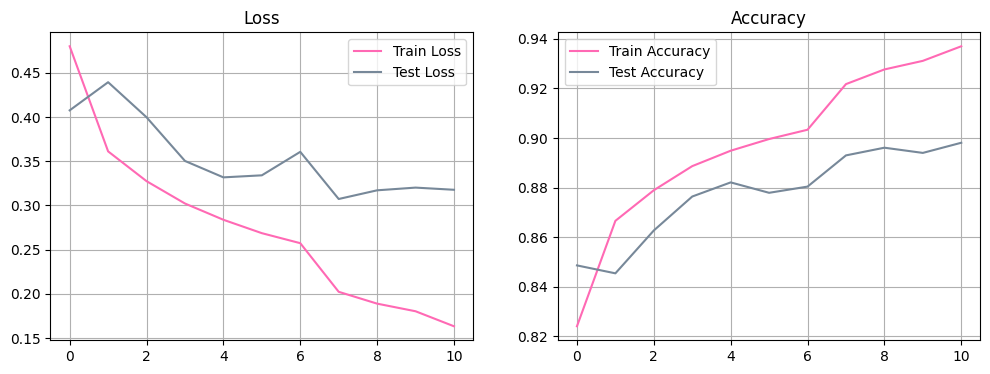

In [18]:
# Побудова графіків функції втрат і точності.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], label='Train Loss', color='hotpink')
plt.plot(training_history.history['val_loss'], label='Test Loss', color='lightslategray')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], label='Train Accuracy', color='hotpink')
plt.plot(training_history.history['val_accuracy'], label='Test Accuracy', color='lightslategray')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [19]:
# Виведення класифікаційного звіту.
test_loss_final_2, test_acc_final_2 = best_neural_net_model.evaluate(test_set_x,test_set_y , verbose=2)
predictions_final_2 = best_neural_net_model.predict(test_set_x)

# Перетворення прогнозів у мітки.
predicted_classes_final_2 = np.argmax(predictions_final_2 , axis=1)

print(classification_report(test_set_y , predicted_classes_final_2 , target_names=label_names))

313/313 - 1s - 2ms/step - accuracy: 0.8998 - loss: 0.3485
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.80      0.83      0.82      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.84      0.83      0.83      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.74      0.72      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



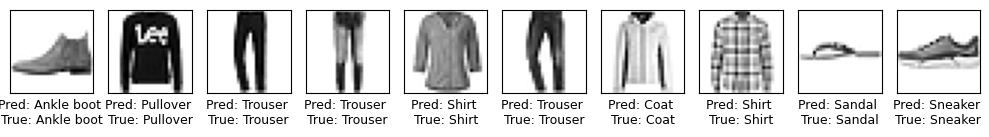

In [20]:
# Виведення результатів розпізнавання із прогнозованим і справжнім класом.
plt.figure(figsize=(10 ,10))
for idx in range(10):
    plt.subplot(1 ,10 ,idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_set_x[idx] , cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {label_names[predicted_classes_final_2[idx]]} \nTrue: {label_names[test_set_y[idx]]}" , fontsize=9)
plt.tight_layout()
plt.show()